# **Data Preprocessing**

In [1]:
# Installation of Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project11/salary_data.csv')

df.head(2)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,$ 84620.05366451902
1,PhD,11,Suburban,Director,59,Male,$ 142591.2558943053


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   1000 non-null   object
 1   Experience  1000 non-null   int64 
 2   Location    997 non-null    object
 3   Job_Title   1000 non-null   object
 4   Age         993 non-null    object
 5   Gender      986 non-null    object
 6   Salary      994 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [4]:
df.isnull().sum()

,0
Education,0
Experience,0
Location,3
Job_Title,0
Age,7
Gender,14
Salary,6


**Removing rows that have null values**

In [5]:

df = df.dropna(subset=['Location'])

df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,7
Gender,13
Salary,6


**Filling Null values**

In [6]:
null_value_columns = df.columns[df.isnull().sum() >= 1]

for i in null_value_columns:
  if df[i].dtype == 'object' or 'category':
    df[i] = df[i].fillna(df[i].mode()[0])
  else:
    df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

<ipython-input-6-154c78cb4ffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(df[i].mode()[0])


,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   997 non-null    object
 1   Experience  997 non-null    int64 
 2   Location    997 non-null    object
 3   Job_Title   997 non-null    object
 4   Age         997 non-null    object
 5   Gender      997 non-null    object
 6   Salary      997 non-null    object
dtypes: int64(1), object(6)
memory usage: 62.3+ KB


**Changing Data types form Object to float**

In [8]:
df['Age'].unique()

array(['63', '59', '61', '45 y', '26', '27', '43', '44', '49', '37', '53',
       '34', '62', '36', '21', '20', '35', '28', '40', '45', '22', '23',
       '50', '33', '31', '25', '47', '64', '24', '60', '57', '32', '48',
       '46', '42', '51', '41', '56', '58', '54', '30', '38', '29', '52',
       '39', '55'], dtype=object)

In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['Education', 'Location', 'Job_Title', 'Age', 'Gender', 'Salary'], dtype='object')

In [10]:
problem_columns = ['Age', 'Salary']


In [11]:
def clean_numeric_column(column):
  if column.dtype != 'object':
    column = column.astype(str)
  return column.str.replace(r'[^\d.]','',regex=True).astype(float)


for col in problem_columns:
    if col in df.columns:
        df[col]=clean_numeric_column(df[col])
print(df.dtypes)

Education      object
Experience      int64
Location       object
Job_Title      object
Age           float64
Gender         object
Salary        float64
dtype: object


In [12]:
df['Age'] = df['Age'].astype(int)

In [13]:
df.dtypes

,0
Education,object
Experience,int64
Location,object
Job_Title,object
Age,int64
Gender,object
Salary,float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   997 non-null    object 
 1   Experience  997 non-null    int64  
 2   Location    997 non-null    object 
 3   Job_Title   997 non-null    object 
 4   Age         997 non-null    int64  
 5   Gender      997 non-null    object 
 6   Salary      997 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 62.3+ KB


In [15]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

cordinality = df[categorical_columns].nunique()
cordinality


,0
Education,4
Location,3
Job_Title,4
Gender,2


In [16]:

encoded_df = pd.get_dummies(df[categorical_columns], drop_first=False)

encoded_df


,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Female,Gender_Male
0,False,True,False,False,False,False,True,False,False,False,True,False,True
1,False,False,False,True,False,True,False,False,True,False,False,False,True
2,True,False,False,False,False,True,False,False,False,False,True,True,False
3,False,True,False,False,True,False,False,False,True,False,False,False,True
4,False,False,False,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,True,False,True,False,False,False,True,False
996,False,True,False,False,False,False,True,False,False,True,False,True,False
997,False,False,True,False,True,False,False,True,False,False,False,False,True
998,True,False,False,False,False,True,False,False,True,False,False,True,False


In [17]:
encoded_df = encoded_df.astype(int)

In [18]:
df = df.drop(columns=categorical_columns)
df = pd.concat([df, encoded_df], axis=1)


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experience             997 non-null    int64  
 1   Age                    997 non-null    int64  
 2   Salary                 997 non-null    float64
 3   Education_Bachelor     997 non-null    int64  
 4   Education_High School  997 non-null    int64  
 5   Education_Master       997 non-null    int64  
 6   Education_PhD          997 non-null    int64  
 7   Location_Rural         997 non-null    int64  
 8   Location_Suburban      997 non-null    int64  
 9   Location_Urban         997 non-null    int64  
 10  Job_Title_Analyst      997 non-null    int64  
 11  Job_Title_Director     997 non-null    int64  
 12  Job_Title_Engineer     997 non-null    int64  
 13  Job_Title_Manager      997 non-null    int64  
 14  Gender_Female          997 non-null    int64  
 15  Gender_Male

# **Data spliting**

In [20]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# **Standart comparing**

Liner Regression

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred_lr=lr.predict(X_test)


In [24]:
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

print("Liner Regression mse:", mse_lr)
print("Liner Regression r2:", r2_lr)

print("Liner Regression Mean Cross-validation scores: ", cv_scores_lr.mean())

Liner Regression mse: 82753364.71768872
Liner Regression r2: 0.8994509274341368
Liner Regression Mean Cross-validation scores:  0.8583198993202339


Decision Tree

In [25]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
y_pred_dt=dt.predict(X_test)


In [27]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("Decision Tree mse:", mse_dt)
print("Decision Tree r2:", r2_dt)

cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Decision Tree mse: 219523550.79715556
Decision Tree r2: 0.7332689792817448
Decision Tree Mean Cross-validation scores:  0.6414121284616969


Random Forest

In [28]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_rf=rf.predict(X_test)


In [30]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("Random Forest mse:", mse_rf)
print("Random Forest r2:", r2_rf)

cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest Mean Cross-validation scores: ", cv_scores_rf.mean())

Random Forest mse: 106350117.33330958
Random Forest r2: 0.870779808149006
Random Forest Mean Cross-validation scores:  0.8082329338299943


KNN

In [31]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [32]:
y_pred_knn = knn.predict(X_test)


In [33]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN mse:", mse_knn)
print("KNN r2:", r2_knn)

cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5)
print("KNN Mean Cross-validation scores: ", cv_scores_knn.mean())

KNN mse: 564281641.381793
KNN r2: 0.3143723412281453
KNN Mean Cross-validation scores:  0.09340329014995637


# **Comparing after scaling**

In [22]:
scaler = StandardScaler()

df[['Experience', 'Age']] = scaler.fit_transform(df[['Experience', 'Age']])
X = df.drop(columns=['Salary'])
y = df['Salary']


X_train_scaled, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

In [23]:
X

,Experience,Age,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Female,Gender_Male
0,-0.810063,1.523507,0,1,0,0,0,0,1,0,0,0,1,0,1
1,-0.450262,1.229268,0,0,0,1,0,1,0,0,1,0,0,0,1
2,1.588609,1.376387,1,0,0,0,0,1,0,0,0,0,1,1,0
3,1.708543,0.199430,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1.228808,-1.198206,0,0,0,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.810063,-1.271766,0,1,0,0,0,1,0,1,0,0,0,1,0
996,1.108875,-0.903967,0,1,0,0,0,0,1,0,0,1,0,1,0
997,0.389273,0.125871,0,0,1,0,1,0,0,1,0,0,0,0,1
998,1.468675,-0.830407,1,0,0,0,0,1,0,0,1,0,0,1,0


In [24]:
y

,Salary
0,84620.053665
1,142591.255894
2,97800.255404
3,96834.671282
4,132157.786175
...,...
995,64683.389864
996,74468.205020
997,98207.026024
998,108544.922720


Liner Regression

In [47]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)



LinearRegression()

In [48]:
y_pred_lr=lr.predict(X_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)


print("Liner Regression mse:", mse_lr)
print("Liner Regression r2:", r2_lr)

cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Liner Regression Mean Cross-validation scores: ", cv_scores_lr.mean())


Liner Regression mse: 82616255.92492744
Liner Regression r2: 0.8996175208046879
Liner Regression Mean Cross-validation scores:  0.852205190150619


Decision Tree

In [27]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)



DecisionTreeRegressor(random_state=42)

In [28]:
y_pred_dt=dt.predict(X_test_scaled)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("Decision Tree mse:", mse_dt)
print("Decision Tree r2:", r2_dt)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Decision Tree mse: 219494454.41288576
Decision Tree r2: 0.7333043327016732
Decision Tree Mean Cross-validation scores:  0.641704692350525


Random Forest

In [29]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)



RandomForestRegressor(random_state=42)

In [30]:

y_pred_rf=rf.predict(X_test_scaled)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("Random Forest mse:", mse_rf)
print("Random Forest r2:", r2_rf)

cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest Mean Cross-validation scores: ", cv_scores_rf.mean())

Random Forest mse: 105403598.41694011
Random Forest r2: 0.8719298713462146
Random Forest Mean Cross-validation scores:  0.8081873952616101


KNN

In [31]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [32]:
y_pred_knn=knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN mse:", mse_knn)
print("KNN r2:", r2_knn)

cv_scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("KNN Mean Cross-validation scores: ", cv_scores_knn.mean())

KNN mse: 162689815.8129102
KNN r2: 0.8023245320392077
KNN Mean Cross-validation scores:  0.7052896364961059


# Comparing After Feature engineering


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experience             997 non-null    int64  
 1   Age                    997 non-null    int64  
 2   Salary                 997 non-null    float64
 3   Education_Bachelor     997 non-null    int64  
 4   Education_High School  997 non-null    int64  
 5   Education_Master       997 non-null    int64  
 6   Education_PhD          997 non-null    int64  
 7   Location_Rural         997 non-null    int64  
 8   Location_Suburban      997 non-null    int64  
 9   Location_Urban         997 non-null    int64  
 10  Job_Title_Analyst      997 non-null    int64  
 11  Job_Title_Director     997 non-null    int64  
 12  Job_Title_Engineer     997 non-null    int64  
 13  Job_Title_Manager      997 non-null    int64  
 14  Gender_Female          997 non-null    int64  
 15  Gender_Male

In [21]:
df.columns

Index(['Experience', 'Age', 'Salary', 'Education_Bachelor',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Job_Title_Analyst', 'Job_Title_Director', 'Job_Title_Engineer',
       'Job_Title_Manager', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [22]:
df['Experience_to_Age'] = df['Experience'] / df['Age']
df['Years_Before_Work'] = df['Age'] - df['Experience']
df['Salary_Per_Year_Experience'] = df['Salary'] / df['Experience']

df['Highest_Education'] = (df['Education_Bachelor'] * 1 + df['Education_Master'] * 2 + df['Education_PhD'] * 3)

df['Is_Postgraduate'] = (df['Education_Master'] + df['Education_PhD']).clip(upper=1)

df['Seniority_Level'] = (df['Job_Title_Analyst'] * 1 +
                         df['Job_Title_Engineer'] * 2 +
                         df['Job_Title_Manager'] * 3 +
                         df['Job_Title_Director'] * 4)

df['Is_Managerial'] = (df['Job_Title_Manager'] + df['Job_Title_Director']).clip(upper=1)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Experience                  997 non-null    int64  
 1   Age                         997 non-null    int64  
 2   Salary                      997 non-null    float64
 3   Education_Bachelor          997 non-null    int64  
 4   Education_High School       997 non-null    int64  
 5   Education_Master            997 non-null    int64  
 6   Education_PhD               997 non-null    int64  
 7   Location_Rural              997 non-null    int64  
 8   Location_Suburban           997 non-null    int64  
 9   Location_Urban              997 non-null    int64  
 10  Job_Title_Analyst           997 non-null    int64  
 11  Job_Title_Director          997 non-null    int64  
 12  Job_Title_Engineer          997 non-null    int64  
 13  Job_Title_Manager           997 non-null

In [24]:
df.head(10)

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,...,Job_Title_Manager,Gender_Female,Gender_Male,Experience_to_Age,Years_Before_Work,Salary_Per_Year_Experience,Highest_Education,Is_Postgraduate,Seniority_Level,Is_Managerial
0,8,63,84620.053665,0,1,0,0,0,0,1,...,1,0,1,0.126984,55,10577.506708,0,0,3,1
1,11,59,142591.255894,0,0,0,1,0,1,0,...,0,0,1,0.186441,48,12962.841445,3,1,4,1
2,28,61,97800.255404,1,0,0,0,0,1,0,...,1,1,0,0.459016,33,3492.866264,1,0,3,1
3,29,45,96834.671282,0,1,0,0,1,0,0,...,0,0,1,0.644444,16,3339.126596,0,0,4,1
4,25,26,132157.786175,0,0,0,1,0,0,1,...,0,1,0,0.961538,1,5286.311447,3,1,1,0
5,19,27,142591.255894,0,0,0,1,1,0,0,...,0,1,0,0.703704,8,7504.802942,3,1,4,1
6,4,27,130567.649455,0,0,0,1,1,0,0,...,0,1,0,0.148148,23,32641.912364,3,1,4,1
7,13,27,148707.740759,0,0,0,1,0,1,0,...,0,1,0,0.481481,14,11439.056981,3,1,4,1
8,20,27,95945.275429,1,0,0,0,0,0,1,...,0,1,0,0.740741,7,4797.263771,1,0,2,0
9,14,27,133339.389682,0,0,0,1,0,0,1,...,0,1,0,0.518519,13,9524.242120,3,1,1,0


In [25]:
X_f = df.drop(columns=['Salary'])
y_f = df['Salary']

In [26]:
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Experience                  997 non-null    int64  
 1   Age                         997 non-null    int64  
 2   Education_Bachelor          997 non-null    int64  
 3   Education_High School       997 non-null    int64  
 4   Education_Master            997 non-null    int64  
 5   Education_PhD               997 non-null    int64  
 6   Location_Rural              997 non-null    int64  
 7   Location_Suburban           997 non-null    int64  
 8   Location_Urban              997 non-null    int64  
 9   Job_Title_Analyst           997 non-null    int64  
 10  Job_Title_Director          997 non-null    int64  
 11  Job_Title_Engineer          997 non-null    int64  
 12  Job_Title_Manager           997 non-null    int64  
 13  Gender_Female               997 non-null

In [27]:
mi_scores = mutual_info_regression(X_f, y_f)

mi_scores_df = pd.DataFrame(mi_scores, index=X_f.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                            MI Score
Highest_Education           0.477612
Is_Postgraduate             0.345984
Salary_Per_Year_Experience  0.305636
Education_PhD               0.254980
Education_High School       0.240965
Seniority_Level             0.134591
Experience                  0.105166
Is_Managerial               0.092839
Education_Bachelor          0.087129
Education_Master            0.079206
Job_Title_Director          0.078923
Job_Title_Analyst           0.074285
Years_Before_Work           0.065621
Experience_to_Age           0.045895
Job_Title_Engineer          0.041789
Gender_Female               0.014213
Gender_Male                 0.014076
Location_Urban              0.006618
Age                         0.000000
Job_Title_Manager           0.000000
Location_Suburban           0.000000
Location_Rural              0.000000


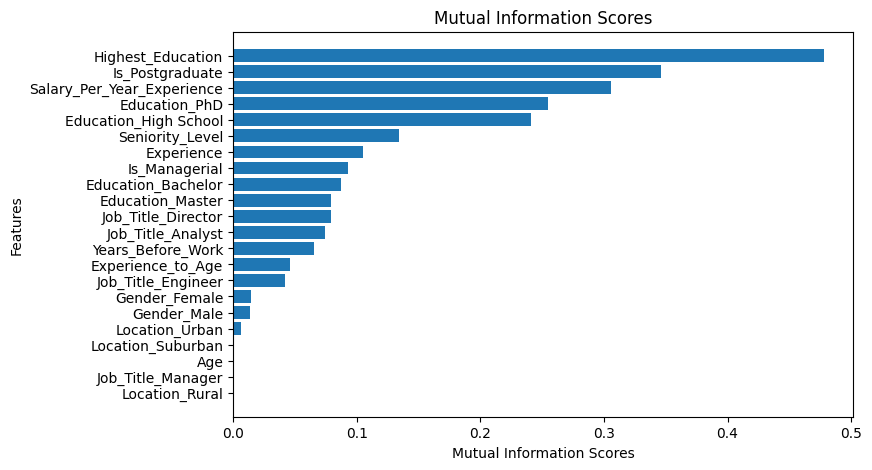

In [28]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Score"])

In [29]:
X_f.drop(['Job_Title_Manager', 'Location_Suburban', 'Location_Rural'], axis=1, inplace=True)
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Experience                  997 non-null    int64  
 1   Age                         997 non-null    int64  
 2   Education_Bachelor          997 non-null    int64  
 3   Education_High School       997 non-null    int64  
 4   Education_Master            997 non-null    int64  
 5   Education_PhD               997 non-null    int64  
 6   Location_Urban              997 non-null    int64  
 7   Job_Title_Analyst           997 non-null    int64  
 8   Job_Title_Director          997 non-null    int64  
 9   Job_Title_Engineer          997 non-null    int64  
 10  Gender_Female               997 non-null    int64  
 11  Gender_Male                 997 non-null    int64  
 12  Experience_to_Age           997 non-null    float64
 13  Years_Before_Work           997 non-null

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X_f, y_f, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [31]:
X_train.head()

,Experience,Age,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Urban,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Gender_Female,Gender_Male,Experience_to_Age,Years_Before_Work,Salary_Per_Year_Experience,Highest_Education,Is_Postgraduate,Seniority_Level,Is_Managerial
845,21,43,0,0,1,0,0,1,0,0,1,0,0.488372,22,5643.380761,2,1,1,0
633,18,63,1,0,0,0,1,0,0,0,0,1,0.285714,45,6065.263882,1,0,3,1
397,24,29,0,0,1,0,1,0,0,0,0,1,0.827586,5,6420.062200,2,1,3,1
932,25,57,0,0,0,1,0,0,0,1,0,1,0.438596,32,6004.579156,3,1,2,0
601,21,64,0,0,1,0,0,0,0,1,1,0,0.328125,43,5444.938675,2,1,2,0


In [32]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [33]:
X_train_scaled

array([[ 0.75423761,  0.06598826, -0.60110575, ...,  1.01299694,
        -1.34116246, -1.04551092],
       [ 0.39911245,  1.53779034,  1.66360078, ..., -0.98716982,
         0.39153492,  0.95647016],
       [ 1.10936278, -0.9642732 , -0.60110575, ...,  1.01299694,
         0.39153492,  0.95647016],
       ...,
       [ 0.5174875 ,  1.09624972, -0.60110575, ...,  1.01299694,
         1.25788361,  0.95647016],
       [ 0.63586256,  0.8018893 , -0.60110575, ...,  1.01299694,
         1.25788361,  0.95647016],
       [-1.13976326, -1.47940393, -0.60110575, ..., -0.98716982,
         1.25788361,  0.95647016]])

In [34]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

In [35]:
y_pred_lr=lr.predict(X_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)


print("Liner Regression mse:", mse_lr)
print("Liner Regression r2:", r2_lr)

cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Liner Regression Mean Cross-validation scores: ", cv_scores_lr.mean())


Liner Regression mse: 82446703.21090947
Liner Regression r2: 0.8998235350036717
Liner Regression Mean Cross-validation scores:  0.8544955618583892


In [36]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)



DecisionTreeRegressor(random_state=42)

In [37]:
y_pred_dt=dt.predict(X_test_scaled)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("Decision Tree mse:", mse_dt)
print("Decision Tree r2:", r2_dt)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Decision Tree mse: 144560323.7723876
Decision Tree r2: 0.824352683003021
Decision Tree Mean Cross-validation scores:  0.749682701761401


In [38]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)



RandomForestRegressor(random_state=42)

In [39]:

y_pred_rf=rf.predict(X_test_scaled)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("Random Forest mse:", mse_rf)
print("Random Forest r2:", r2_rf)

cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest Mean Cross-validation scores: ", cv_scores_rf.mean())

Random Forest mse: 71734685.96259142
Random Forest r2: 0.9128391193645295
Random Forest Mean Cross-validation scores:  0.8560695898399912


In [40]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [41]:
y_pred_knn=knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN mse:", mse_knn)
print("KNN r2:", r2_knn)

cv_scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("KNN Mean Cross-validation scores: ", cv_scores_knn.mean())

KNN mse: 112692832.65983811
KNN r2: 0.8630731227978131
KNN Mean Cross-validation scores:  0.7882606081188793


# New Section

# Summary

In [ ]:
# Standard
# Liner Regression mse: 82753364.71768872
# Liner Regression r2: 0.8994509274341368
# Liner Regression Mean Cross-validation scores:  0.8583198993202339

# Scaling
# Liner Regression mse: 82753364.71768862
# Liner Regression r2: 0.8994509274341369
# Liner Regression Mean Cross-validation scores:  0.8583198993202339

# Feature engineering
# Liner Regression mse: 82446703.21090947
# Liner Regression r2: 0.8998235350036717
# Liner Regression Mean Cross-validation scores:  0.8544955618583892


In [ ]:
#Standard
# Decision Tree mse: 219523550.79715556
# Decision Tree r2: 0.7332689792817448
# Decision Tree Mean Cross-validation scores:  0.6414121284616969

# Scaling
# Decision Tree mse: 219494454.41288576
# Decision Tree r2: 0.7333043327016732
# Decision Tree Mean Cross-validation scores:  0.641704692350525

# Feature engineering
# Decision Tree mse: 144560323.7723876
# Decision Tree r2: 0.824352683003021
# Decision Tree Mean Cross-validation scores:  0.749682701761401


In [ ]:
# Standard
# Random Forest mse: 106350117.33330958
# Random Forest r2: 0.870779808149006
# Random Forest Mean Cross-validation scores:  0.8082329338299943

# Scaling
# Random Forest mse: 105403598.41694011
# Random Forest r2: 0.8719298713462146
# Random Forest Mean Cross-validation scores:  0.8081873952616101

# Feature engineering
# Random Forest mse: 71734685.96259142
# Random Forest r2: 0.9128391193645295
# Random Forest Mean Cross-validation scores:  0.8560695898399912

In [ ]:
# StandardScaler
# KNN mse: 564281641.381793
# KNN r2: 0.3143723412281453
# KNN Mean Cross-validation scores:  0.09340329014995637

# Scaling
# KNN mse: 162689815.8129102
# KNN r2: 0.8023245320392077
# KNN Mean Cross-validation scores:  0.7052896364961059

# Feature engineering
# KNN mse: 112692832.65983811
# KNN r2: 0.8630731227978131
# KNN Mean Cross-validation scores:  0.7882606081188793